# Preparation

In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2

K.clear_session()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
base_dir = '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset'

# Check Dataset

In [8]:
import os
from PIL import Image, UnidentifiedImageError

def check_images(directory):
    valid_image_count = 0
    print(f"Checking images in {directory}...")

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()
                print(f"Valid image: {file_path}")
                valid_image_count += 1
            except (UnidentifiedImageError, OSError) as e:
                print(f"Invalid image detected: {file_path} - {e}")
                os.remove(file_path)

    print(f"\nTotal valid images: {valid_image_count}")

check_images(base_dir)

Checking images in /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset...
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-1.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-2.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-3.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-4.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-6.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-8.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-9.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-10.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/martabak-telur-1.png
Valid image: /content/drive/My Drive/Capstone/dataset/FoodIMG_D

# <b>IMAGE PROCESSSING</b>

In [9]:
from PIL import Image
import numpy as np

try:
    img = Image.open('/content/drive/MyDrive/Capstone/dataset/ayam/mie-ayam-2.png')
    img = img.convert("RGB")
    img_array = np.array(img)
    dims = np.shape(img_array)
    matrix = np.reshape(img_array, (dims[0] * dims[1], dims[2]))
    print(np.shape(matrix))

except Exception as e:
    print(f"Error loading image: {e}")

Error loading image: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone/dataset/ayam/mie-ayam-2.png'


<h2>Plot for visualizing pixel intensities for RGB in color space</h2>

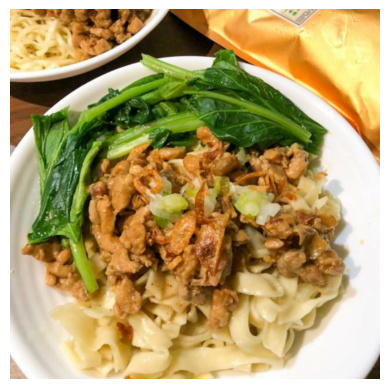

Image shape ->  (640, 640)
Color channels ->  3
Min color depth : 0, Max color depth : 255


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('/content/drive/MyDrive/Capstone/dataset/FoodIMG_Dataset/ayam/mie-ayam-2.png')
img = np.array(img)
dims = img.shape
plt.imshow(img)
plt.axis('off')
plt.show()

# Print image properties
print("Image shape -> ", dims[:2])
print("Color channels -> ", dims[2])
print("Min color depth : {}, Max color depth : {}".format(np.min(img), np.max(img)))

# <b>Data Splitting</b>

In [19]:
import os
from sklearn.model_selection import train_test_split

categories = os.listdir(base_dir)
image_paths = []
labels = []

for label, category in enumerate(categories):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            if img_file.endswith(".png") or img_file.endswith(".jpg"):
                img_path = os.path.join(category_path, img_file)
                image_paths.append(img_path)
                labels.append(label)

X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

print("Some training file paths:", X_train[:5])
print("Some validation file paths:", X_val[:5])
print("Some testing file paths:", X_test[:5])


Training set size: 840
Validation set size: 180
Test set size: 180
Some training file paths: ['/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/wijen/Copy of ayam-wijen-4.png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/ikan/Copy of gohu_ikan (3).png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/gandum/putu_mayang (5).png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/coklat/Salinan kue-pukis-8.png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/kacang_tanah/rujak-cingur-9.png']
Some validation file paths: ['/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/Sapi/sate_sapi (2).png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/ayam/Copy of soto-ayam-7.png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/Copy of telur-ceplok-9.png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/kerang/Copy of kerang-saus-padang-5.png', '/content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/ka

# <b>Exploratory Data Analysis (EDA)</b>

## Let's visualize our dataset by randomly picking an image from every class

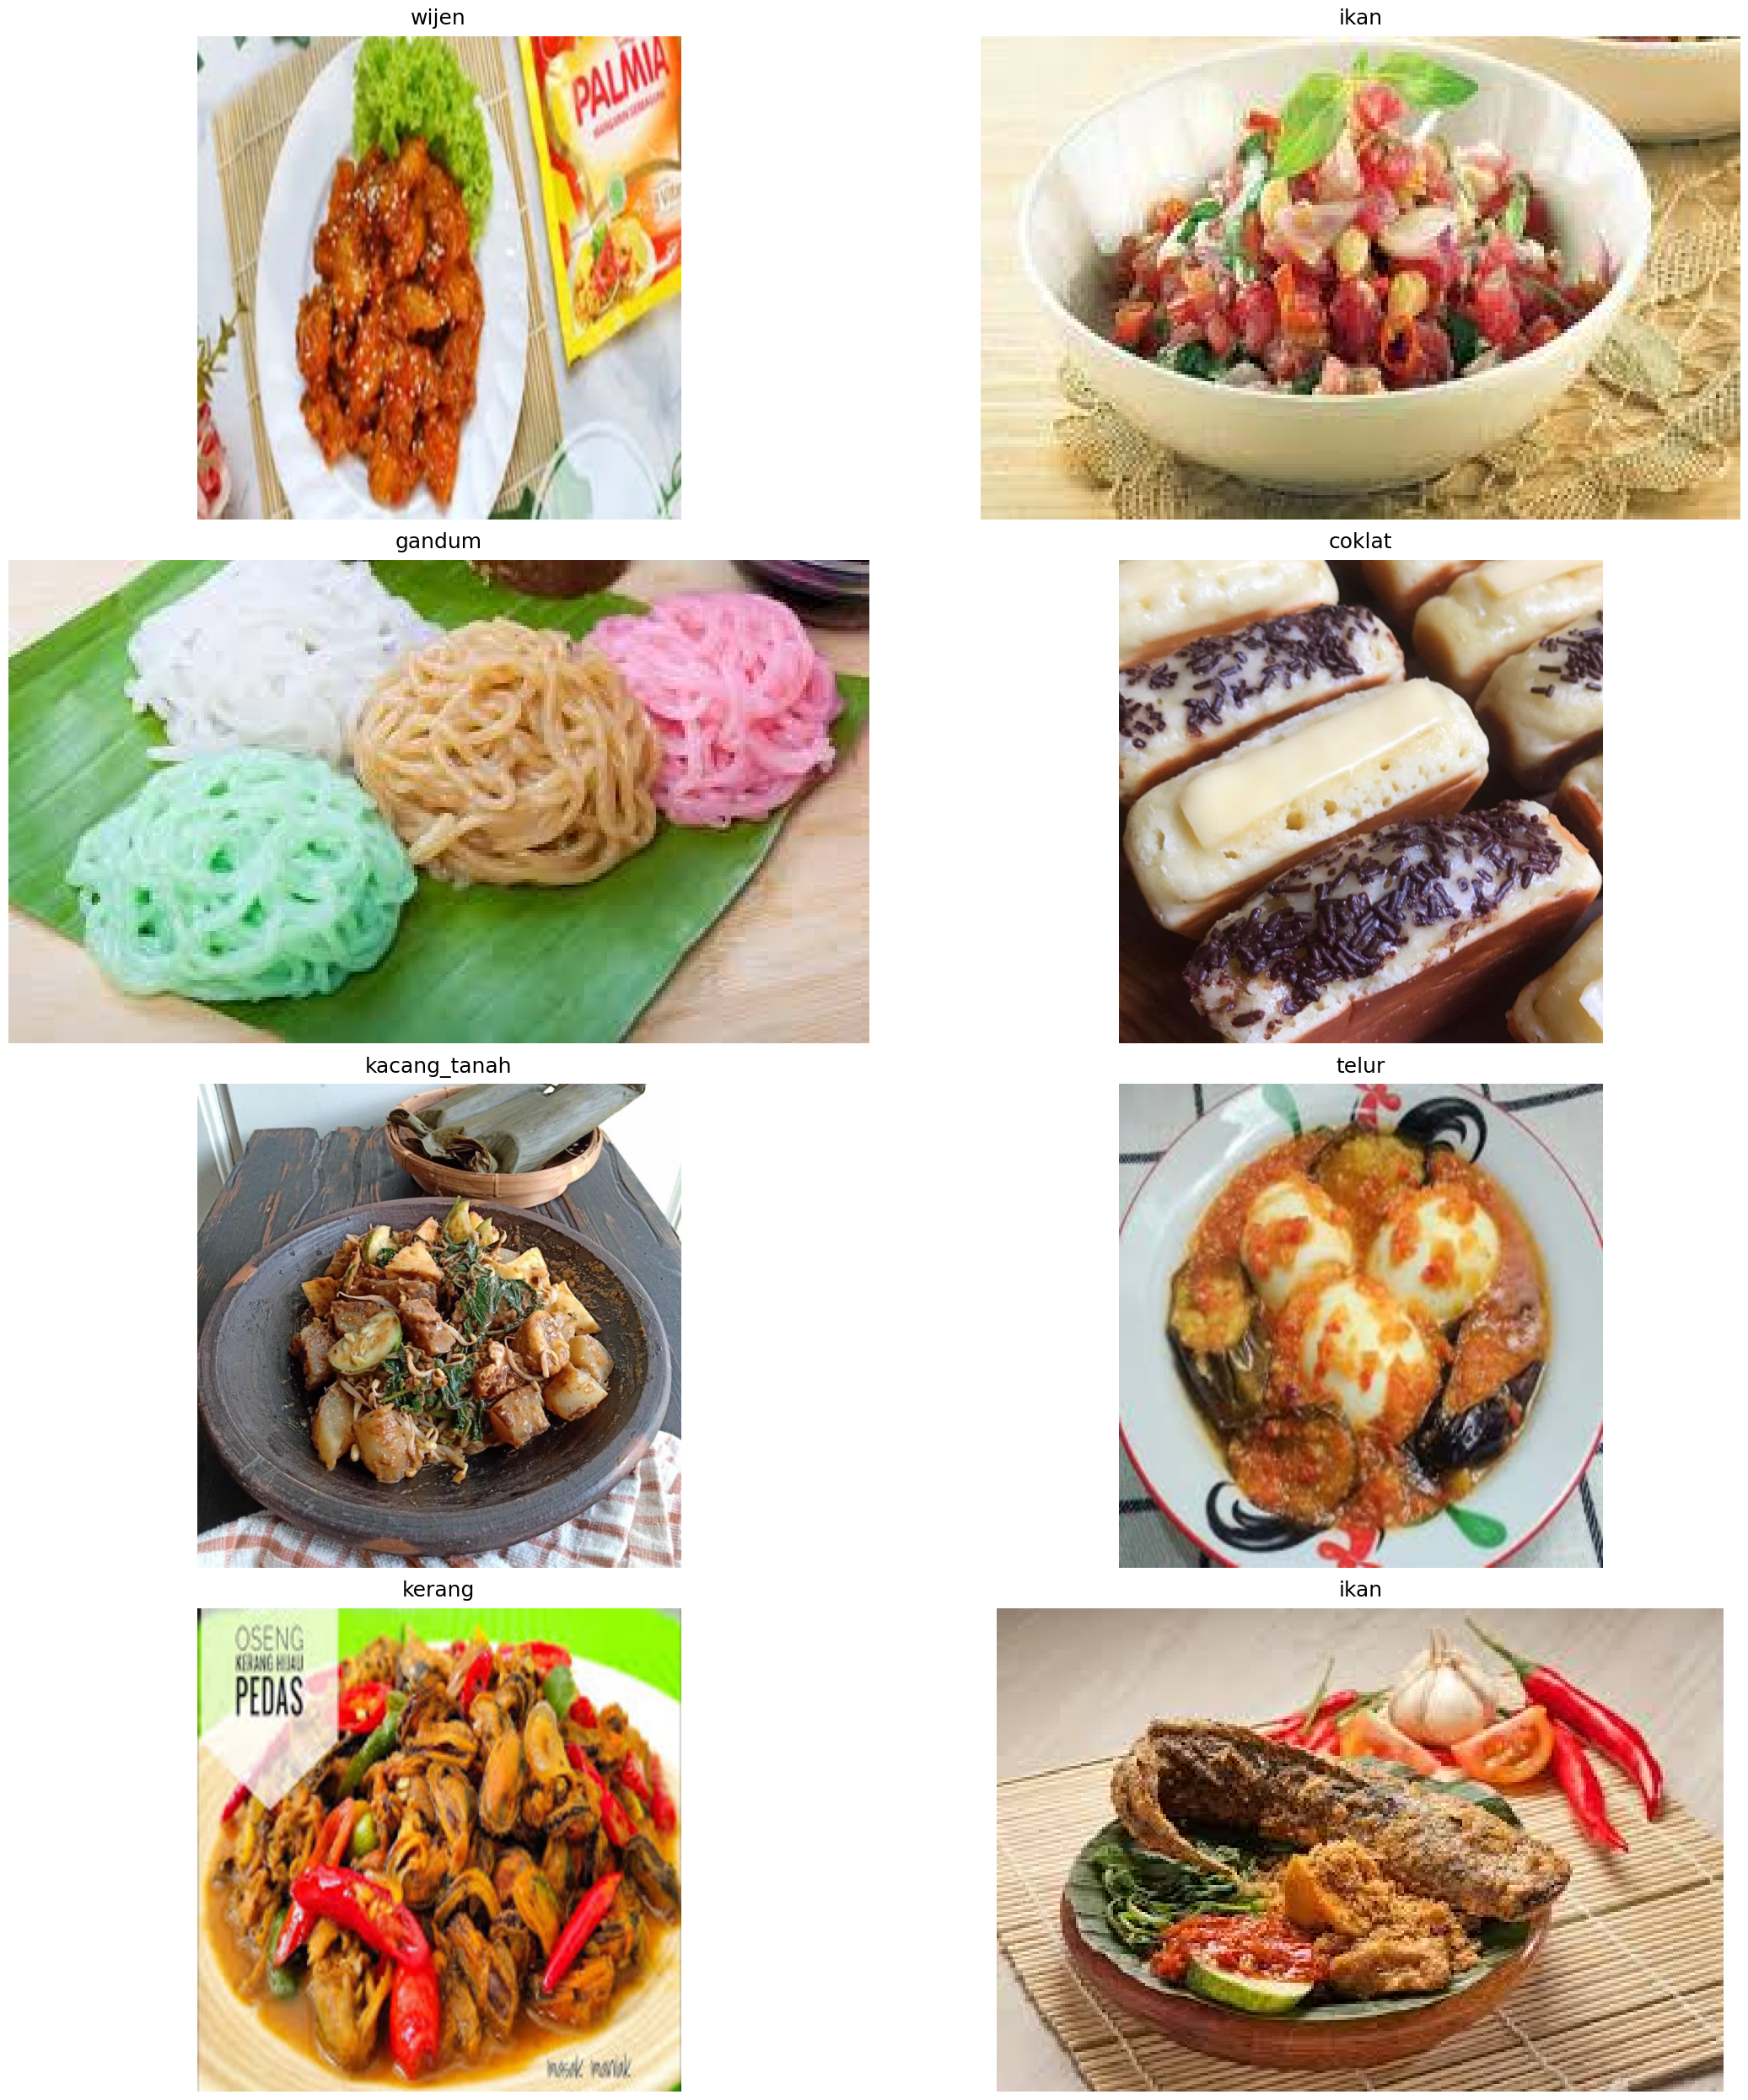

Visualized Images:
1. Category: wijen, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/wijen/Copy of ayam-wijen-4.png
2. Category: ikan, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/ikan/Copy of gohu_ikan (3).png
3. Category: gandum, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/gandum/putu_mayang (5).png
4. Category: coklat, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/coklat/Salinan kue-pukis-8.png
5. Category: kacang_tanah, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/kacang_tanah/rujak-cingur-9.png
6. Category: telur, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/telur/telur-balado-8.png
7. Category: kerang, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/kerang/tumis-kerang-pedas-2.png
8. Category: ikan, File Path: /content/drive/My Drive/Capstone/dataset/FoodIMG_Dataset/ikan/Copy of pecel_ikan (2).png
9. Category: telur, File Pat

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

def validate_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except (UnidentifiedImageError, OSError):
        return False

validated_X_train = [path for path in X_train if validate_image(path)]


images = []
displayed_images = []


for image_path in validated_X_train:
    category = image_path.split('/')[-2]

    try:
        with Image.open(image_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_array = np.array(img)

        images.append(img_array)
        displayed_images.append((category, image_path))
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        continue

fig = plt.figure(1, figsize=(25, 25))

for subplot, image_ in enumerate(images[:8]):
    category, _ = displayed_images[subplot]
    ax = plt.subplot(4, 2, subplot + 1)
    ax.set_title(category, pad=10, size=18)
    ax.imshow(image_)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Visualized Images:")
for i, (category, image_path) in enumerate(displayed_images[:12]):
    print(f"{i + 1}. Category: {category}, File Path: {image_path}")


<hr>

# Data Augmentation

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from PIL import Image

img_width, img_height = 224, 224
batch_size = 16
n_classes = len(set(labels))

def preprocess_images(image_paths, target_size):
    images = []
    for img_path in image_paths:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                img_array = np.array(img) / 255.0
                images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return np.array(images)

X_train_images = preprocess_images(X_train, (img_width, img_height))
X_val_images = preprocess_images(X_val, (img_width, img_height))
X_test_images = preprocess_images(X_test, (img_width, img_height))

y_train_one_hot = to_categorical(y_train, num_classes=n_classes)
y_val_one_hot = to_categorical(y_val, num_classes=n_classes)
y_test_one_hot = to_categorical(y_test, num_classes=n_classes)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train_images, y_train_one_hot, batch_size=batch_size)

val_generator = val_test_datagen.flow(
    X_val_images, y_val_one_hot, batch_size=batch_size)

test_generator = val_test_datagen.flow(
    X_test_images, y_test_one_hot, batch_size=batch_size)

print(f"Training samples: {len(train_generator)} batches")
print(f"Validation samples: {len(val_generator)} batches")
print(f"Test samples: {len(test_generator)} batches")

Training samples: 53 batches
Validation samples: 12 batches
Test samples: 12 batches


In [24]:
class_map = {i: category for i, category in enumerate(categories)}
print(class_map)

{0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan', 5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu', 9: 'kacang_tanah', 10: 'udang', 11: 'coklat'}


# <b> MODEL TRAINING </b>

## Training the model

In [26]:
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam


n_classes = 12

# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    Dropout(0.5),
    Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))  # L2 regularization
])


for layer in base_model.layers[-15:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,589,004 (9.88 MB)

 Trainable params: 2,554,892 (9.75 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [27]:
# #V 0.0
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
# from tensorflow.keras import regularizers

# # Model Parameters
# n_classes = 12
# img_width, img_height = 299, 299
# batch_size = 16
# nb_train_samples = 840
# nb_validation_samples = 180

# # Build the model
# model = Sequential()

# # 1. Input layer with a Conv2D layer (Kernel: 3x3, 32 filters)
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))

# # 2. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3. Second Conv2D layer
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # 4. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 5. Third Conv2D layer
# model.add(Conv2D(128, (3, 3), activation='relu'))

# # 6. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 7. Flatten the output
# model.add(Flatten())

# # 8. Fully connected (Dense) layer
# model.add(Dense(128, activation='relu'))

# # 9. Dropout to reduce overfitting
# model.add(Dropout(0.2))

# # 10. Output layer with softmax activation for multi-class classification
# mode

# # Col.add(Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))mpile the model
# model.compile(
#     optimizer=SGD(learning_rate=0.0001, momentum=0.9),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callbacks for saving best model and logging training history
# checkpointer = ModelCheckpoint(filepath='cnn_model_best.keras', verbose=1, save_best_only=True)
# csv_logger = CSVLogger('cnn_model_history.log')

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     validation_data=val_generator,
#     validation_steps=nb_validation_samples // batch_size,
#     epochs=20,
#     verbose=2,
#     callbacks=[csv_logger, checkpointer]
# )


In [28]:
# #V 0.1

# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.models import Model, Sequential  # Import Sequential
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras import regularizers  # Import regularizers if using regularization
# from tensorflow.keras.optimizers import SGD

# n_classes = 12
# img_width, img_height = 299, 299
# batch_size = 16

# # Load InceptionV3 pre-trained on ImageNet (without the top layer)
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# # Freeze the base model layers to prevent them from being updated during training
# base_model.trainable = False

# # Build the new model on top of the base model
# model = Sequential()

# # Add the pre-trained base model
# model.add(base_model)

# # Add a global average pooling layer to reduce the output dimensions
# model.add(GlobalAveragePooling2D())

# # Add a fully connected (Dense) layer
# model.add(Dense(256, activation='relu'))

# # Dropout to reduce overfitting
# model.add(Dropout(0.3))

# # Add a fully connected (Dense) layer
# model.add(Dense(128, activation='relu'))

# # Dropout to reduce overfitting
# model.add(Dropout(0.3))

# # Output layer with softmax activation for multi-class classification
# model.add(Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

# # Compile the model
# model.compile(
#     optimizer=SGD(learning_rate=0.0001, momentum=0.9),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

checkpointer = ModelCheckpoint(filepath='cnn_model_best.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('cnn_model_history.log')
ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[csv_logger, checkpointer, ReduceLROnPlateau, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.1468 - loss: 7.2141
Epoch 1: val_loss improved from inf to 6.43245, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 94s 811ms/step - accuracy: 0.1479 - loss: 7.2079 - val_accuracy: 0.3389 - val_loss: 6.4325 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.4396 - loss: 6.1103
Epoch 2: val_loss improved from 6.43245 to 5.96763, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.4400 - loss: 6.1083 - val_accuracy: 0.4333 - val_loss: 5.9676 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6155 - loss: 5.5241
Epoch 3: val_loss improved from 5.96763 to 5.74031, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.6158 - loss: 5.5224 - val_accuracy: 0.5056 - val_loss: 5.7403 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/st

## Loading the Model

In [ ]:
model = load_model('/content/drive/My Drive/Capstone/Saved Model/MobileNetV2_V.2.h5')

## Saving the model

In [ ]:
model.save('/content/drive/My Drive/Capstone/Saved Model/MobileNetV2_V.2.h5')

## Accuracy and Loss curves

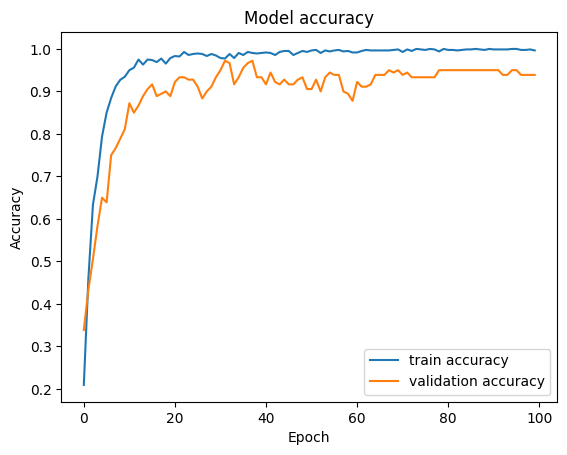

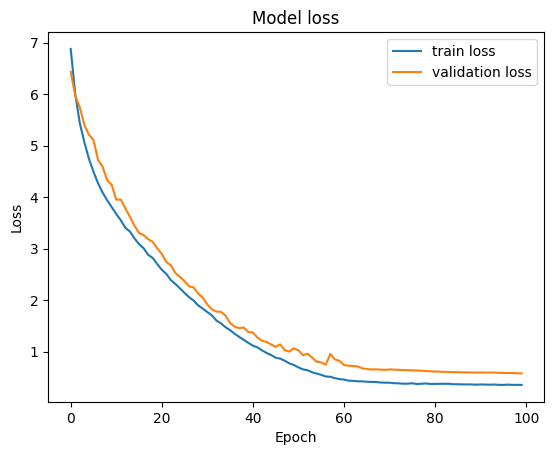

In [30]:
import matplotlib.pyplot as plt  # Add this line

def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

## Load the model

In [ ]:
K.clear_session()
path_to_model = '/content/drive/MyDrive/Capstone/Saved Model/InceptionV3_V2.keras'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
# Save the model in .h5 format
path_to_save_h5 = '/content/drive/MyDrive/Capstone/Saved Model/InceptionV3_V2.h5'
print("Saving the model as .h5 format..")
model.save(path_to_save_h5)
print("Model saved as .h5!")

Saving the model as .h5 format..
Model saved as .h5!


## Testing model

In [32]:
import time
import psutil

start_time = time.time()
process = psutil.Process()

scores = model.evaluate(test_generator, steps=len(test_generator))

end_time = time.time()
elapsed_time = end_time - start_time

memory_used = process.memory_info().rss / (1024 * 1024)

# Print results
print("Test Accuracy: {:.3f}".format(scores[1]))
print(f"Time Taken: {elapsed_time:.2f} seconds")
print(f"Memory Used: {memory_used:.2f} MB")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8768 - loss: 0.6941
Test Accuracy: 0.906
Time Taken: 0.36 seconds
Memory Used: 6999.75 MB


In [37]:
from sklearn.metrics import classification_report
import numpy as np

category = {
    0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan',
    5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu',
    9: 'kacang_tanah', 10: 'udang', 11: 'coklat'
}

y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

target_names = [category[i] for i in range(len(category))]

report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print("Model name: MobileNetV2_V.2")
print(report)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model name: MobileNetV2_V.2
                precision    recall  f1-score   support

         telur       1.00      1.00      1.00        15
        kerang       1.00      1.00      1.00        15
          ayam       0.86      0.80      0.83        15
        gandum       0.87      0.87      0.87        15
          ikan       1.00      1.00      1.00        15
kacang_kedelai       1.00      0.87      0.93        15
          Sapi       0.81      0.87      0.84        15
         wijen       0.87      0.87      0.87        15
          susu       1.00      0.87      0.93        15
  kacang_tanah       0.73      0.73      0.73        15
         udang       0.88      1.00      0.94        15
        coklat       0.88      1.00      0.94        15

      accuracy                           0.91       180
     macro avg       0.91      0.91      0.91       180
  weighted avg       0.91      0.91      0.91       180



## Let's plot a confusion matrix for all the food items

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


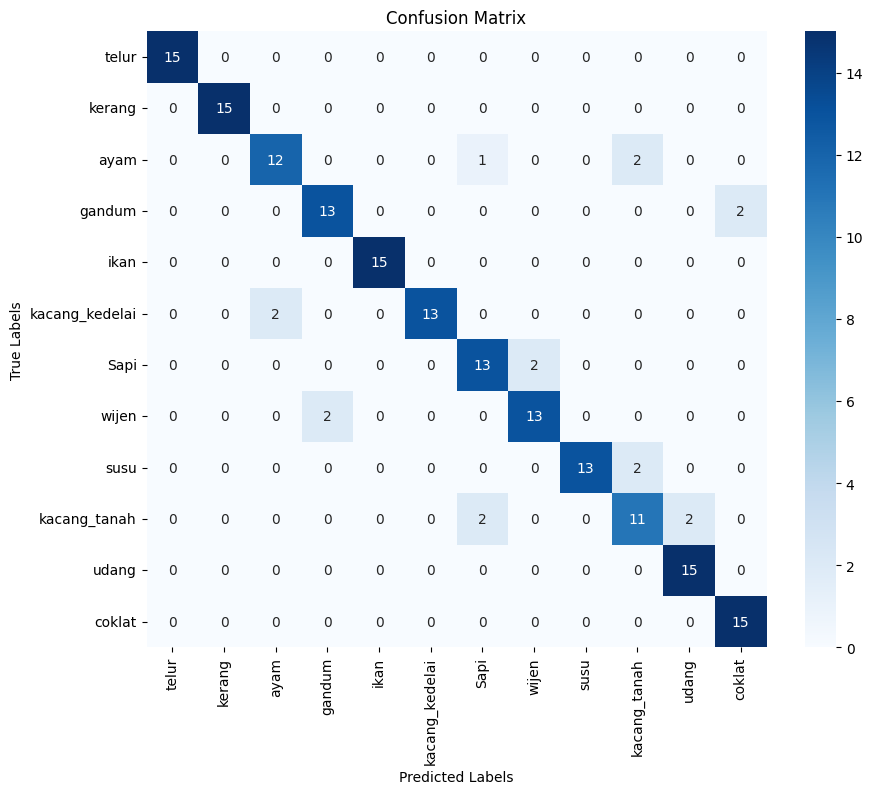

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

category = {
    0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan',
    5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu',
    9: 'kacang_tanah', 10: 'udang', 11: 'coklat'
}

y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[category[i] for i in range(len(category))],
            yticklabels=[category[i] for i in range(len(category))])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Testing model on tflite

In [ ]:
import tensorflow as tf

# Load the Keras model from the .h5 file

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_food_classification.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TFLite and saved as 'MobileNetV2_V.2.tflite'")

Saved artifact at '/tmp/tmp3w0sfrjt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  138701272626304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138700914476832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138704159282400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138701273078016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138701273085760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138700914483344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138704159291200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138704159284864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138704159277648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138704159281696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138701273427

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_food_classification.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TFLite and saved as 'model_food_classification.tflite'")

[  1 224 224   3]


## Function to predict single image or predict all images from a directory

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Updated categories dictionary
category = {
    0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan',
    5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu',
    9: 'kacang_tanah', 10: 'udang', 11: 'coklat'
}

# Function to predict a single image
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.  # Normalize the image

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)  # Get the index of the highest prediction

    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)

# Function to predict a directory of images and compute accuracy
def predict_dir(filedir, model):
    cols = 5
    pos = 0
    images = []
    total_images = len(os.listdir(filedir))
    rows = total_images // cols + 1

    true = filedir.split('/')[-1]  # Assume folder name is the true label

    fig = plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir, i))

    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.  # Normalize the image
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred = category.get(index)  # Get the predicted label
        if pred == true:
            pos += 1

        fig = plt.subplot(rows, cols, subplot + 1)
        fig.set_title(category.get(index), pad=10, size=18)
        plt.imshow(img_array)

    acc = pos / total_images
    print("Accuracy of Test : {:.2f} ({}/{} correct)".format(acc, pos, total_images))
    plt.tight_layout()


- <h3> Single image prediction </h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


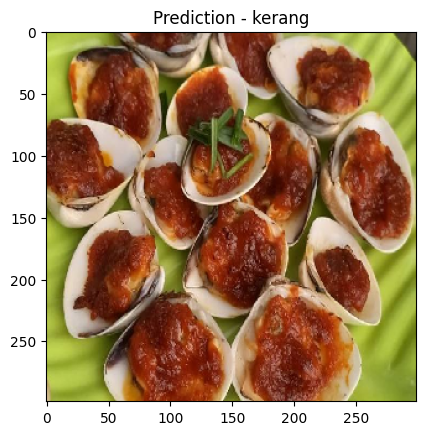

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/kerang-bakar-parape-foto-resep-utama.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


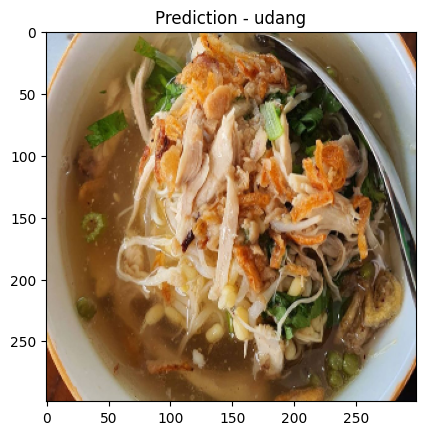

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/soto-ayam-bening-segar_43.png',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


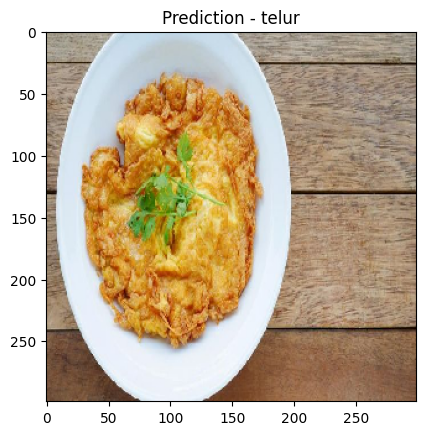

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/telur-dadar-atau-omelette_169.jpeg',model)
# predict_image('/content/drive/MyDrive/Capstone/dataset/Sapi/Copy of empal_gepuk (1).png',model)